In [1]:
using Pkg
Pkg.add("StringEncodings")
Pkg.add("CSV")
Pkg.add("ZipFile")
Pkg.add("DataFrames")
using ZipFile
using CSV
using DataFrames
using StringEncodings
Pkg.add(PackageSpec(name="PyCall", rev="master"))
Pkg.build("PyCall")
using PyCall 
Pkg.add("Conda")
using Conda
Conda.add("mplsoccer")
Conda.add("ipython")
Pkg.add("Pandas")
using Pandas

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
    Updating git-repo `https://github.com/JuliaPy/PyCall.jl.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/b19db3927f0db4151cb86d073689f2428e524576/build.log`
    Building PyCall → `~/.julia/scratchs

Channels:
 - conda-forge
Platform: osx-64
Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda





# All requested packages already installed.



┌ Info: Running `conda install -y ipython` in root environment
└ @ Conda /Users/ronnieday/.julia/packages/Conda/zReqD/src/Conda.jl:181


Channels:
 - conda-forge
Platform: osx-64
Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda





# All requested packages already installed.



   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


Pull all Premier League Data for 2015/16 season

In [2]:

mplsoccer = pyimport("mplsoccer")
parser = mplsoccer.Sbopen()
premier_league_data = parser.match(competition_id=2, season_id=27)

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3754058,2016-01-02,2016-01-02 16:00:00,0,0,available,processing,2021-10-29 23:44:19.940296,2021-06-12 16:17:31.694,20,2,England,Premier League,27,2015/2016,22,Leicester City,male,None,68,England,60,Claudio Ranieri,Claudio Ranieri,1951-10-20,112,Italy,28,AFC Bournemouth,male,None,68,England,38,Eddie Howe,Eddie Howe,1977-11-29,68,England,1.1.0,2,2,1,Regular Season,20,King Power Stadium,68,England,5,Andre Marriner,68,England
1,3754245,2015-10-17,2015-10-17 16:00:00,1,0,available,scheduled,2022-12-01 13:09:17.044015,2021-06-13 16:17:31.694,9,2,England,Premier League,27,2015/2016,27,West Bromwich Albion,male,None,68,England,300,Tony Pulis,Tony Pulis,1958-01-16,249,Wales,41,Sunderland,male,None,68,England,561,Sam Allardyce,Sam Allardyce,1954-10-19,68,England,1.1.0,2,2,1,Regular Season,33,The Hawthorns,68,England,4,Martin Atkinson,68,England
2,3754136,2015-12-19,2015-12-19 18:30:00,1,1,available,scheduled,2020-11-12 23:48:19.757269,2021-06-13 16:17:31.694,17,2,England,Premier League,27,2015/2016,37,Newcastle United,male,None,68,England,40,Steve McClaren,Steve McClaren,1961-05-03,68,England,59,Aston Villa,male,None,68,England,92,Rémi Garde,Rémi Garde,1966-04-03,78,France,1.1.0,2,2,1,Regular Season,4674,St. James'' Park,68,England,4,Martin Atkinson,68,England
3,3754037,2016-04-30,2016-04-30 16:00:00,2,1,available,processing,2021-07-07 17:59:57.456000,2021-06-12 16:17:31.694,36,2,England,Premier League,27,2015/2016,29,Everton,male,None,68,England,263,Roberto Martínez Montoliú,Roberto Martínez,1973-07-13,214,Spain,28,AFC Bournemouth,male,None,68,England,38,Eddie Howe,Eddie Howe,1977-11-29,68,England,1.1.0,2,2,1,Regular Season,12,Goodison Park,68,England,7,Neil Swarbrick,68,England
4,3754039,2016-02-13,2016-02-13 16:00:00,1,2,available,processing,2021-07-25 18:09:51.386000,2021-06-12 16:17:31.694,26,2,England,Premier League,27,2015/2016,31,Crystal Palace,male,None,68,England,382,Alan Pardew,Alan Pardew,1961-07-18,68,England,23,Watford,male,None,68,England,236,Enrique Sánchez Flores,Quique Sánchez Flores,1965-02-05,214,Spain,1.1.0,2,2,1,Regular Season,37,Selhurst Park,68,England,9,Robert Madley,68,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,2015-08-17 21:00:00,1,0,available,scheduled,2022-07-08 21:26:42.829047,2021-06-13 16:17:31.694,2,2,England,Premier League,27,2015/2016,24,Liverpool,male,None,68,England,6,Brendan Rodgers,Brendan Rodgers,1973-01-26,169,Northern Ireland,28,AFC Bournemouth,male,None,68,England,38,Eddie Howe,Eddie Howe,1977-11-29,68,England,1.1.0,2,2,1,Regular Season,6,Anfield,68,England,2,Craig Pawson,68,England
376,3754267,2015-08-15,2015-08-15 16:00:00,0,0,available,scheduled,2020-07-29 05:00:00.000000,2021-06-13 16:17:31.694,2,2,England,Premier League,27,2015/2016,23,Watford,male,None,68,England,236,Enrique Sánchez Flores,Quique Sánchez Flores,1965-02-05,214,Spain,27,We

Select a single game

In [3]:
raw_event, raw_related, raw_freeze, raw_tactics = parser.event(3754058)


(PyObject                                         id  ...  foul_won_penalty
0     9153e9f4-f69c-4e04-8f64-505592e212cd  ...               NaN
1     3fbcf4e7-94d1-485a-be85-fd26a6af0318  ...               NaN
2     06a9a4dc-d9c9-40f6-bd89-437ba7fe682d  ...               NaN
3     100362ee-9311-4187-bd8a-0201d9db2565  ...               NaN
4     2ca23eea-a984-47e4-8243-8f00880ad1c9  ...               NaN
...                                    ...  ...               ...
3571  20baabc3-44a5-4792-8336-60dc513cc0bd  ...               NaN
3572  3196324d-cf4d-4d9c-92b7-5b1cac9a5910  ...               NaN
3573  3052795e-42ae-4543-b039-c52157c92ce6  ...               NaN
3574  3371e127-bdb0-45d1-84c4-eb86c918af6b  ...               NaN
3575  385145e8-fec7-401e-8ad0-55e3e3d1f8ff  ...               NaN

[3576 rows x 71 columns], PyObject       match_id  ... type_name_related
0      3754058  ...        Half Start
1      3754058  ...        Half Start
2      3754058  ...      Ball Receipt
3      375

In [4]:
df_event= DataFrames.DataFrame(Pandas.DataFrame(raw_event))


Row,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,under_pressure,pass_switch,outcome_id,outcome_name,aerial_won,counterpress,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_key_pass_id,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,off_camera,out,pass_cross,pass_cut_back,dribble_overrun,dribble_nutmeg,foul_committed_advantage,foul_won_advantage,ball_recovery_recovery_failure,foul_won_defensive,end_z,shot_first_time,foul_committed_offensive,pass_deflected,shot_one_on_one,foul_committed_card_id,foul_committed_card_name,substitution_replacement_id,substitution_replacement_name,foul_committed_penalty,foul_won_penalty
,String,Int64,Int64,Time,Int64,Int64,Int64,Float64,Int64,Int64,String,Int64,String,Int64,String,Int64,String,Union…,Float64,Any,Float64,Any,Float64,Any,Float64,Float64,Float64,Any,Float64,Float64,Float64,Any,Float64,Any,Float64,Float64,Float64,Real,Float64,Any,Real,Float64,Any,Real,Float64,Any,Float64,Any,Float64,Any,Float64,Float64,Real,Real,Real,Real,Real,Real,Real,Real,Float64,Real,Real,Real,Real,Float64,Any,Float64,Any,Real,Real
1,9153e9f4-f69c-4e04-8f64-505592e212cd,1,1,00:00:00,0,0,1,0.0,3754058,35,Starting XI,22,Leicester City,1,Regular Play,22,Leicester City,442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3fbcf4e7-94d1-485a-be85-fd26a6af0318,2,1,00:00:00,0,0,1,0.0,3754058,35,Starting XI,22,Leicester City,1,Regular Play,28,AFC Bournemouth,4141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06a9a4dc-d9c9-40f6-bd89-437ba7fe682d,3,1,00:00:00,0,0,1,0.0,3754058,18,Half Start,22,Leicester City,1,Regular Play,28,AFC Bournemouth,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100362ee-9311-4187-bd8a-0201d9db2565,4,1,00:00:00,0,0,1,0.0,3754058,18,Half Start,22,Leicester City,1,Regular Play,22,Leicester City,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2ca23eea-a984-47e4-8243-8f00880ad1c9,5,1,00:00:01.753,0,1,2,0.308263,3754058,30,Pass,28,AFC Bournemouth,9,From Kick Off,28,AFC Bournemouth,,3343.0,Dan Gosling,13.0,Right Center Midfield,3346.0,Joshua King,3.55106,1.74057,1.0,Ground Pass,60.4,43.6,65.0,Kick Off,40.0,Right Foot,61.0,40.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1f98c89e-2326-4200-8c12-a987fdbbaf2e,6,1,00:00:02.061,0,2,2,NaN,3754058,42,Ball Receipt,28,AFC Bournemouth,9,From Kick Off,28,AFC Bournemouth,,3346.0,Joshua King,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.4,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,a936e18c-3979-4576-8cc0-94114f1599db,7,1,00:00:02.061,0,2,2,0.015864,3754058,43,Carry,28,AFC Bournemouth,9,From Kick Off,28,AFC Bournemouth,,3346.0,Joshua King,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,60.4,43.6,NaN,NaN,NaN,NaN,60.4,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
df_freeze = DataFrames.DataFrame(Pandas.DataFrame(raw_freeze))

Row,teammate,match_id,id,x,y,player_id,player_name,position_id,position_name,event_freeze_id
,Bool,Int64,String,Float64,Float64,Int64,String,Int64,String,Int64
1,true,3754058,72596ffe-393e-4a75-82c6-5fb82ae36d4d,106.1,23.9,3304,Harry Arter,15,Left Center Midfield,1
2,true,3754058,72596ffe-393e-4a75-82c6-5fb82ae36d4d,111.1,40.3,3346,Joshua King,23,Center Forward,2
3,true,3754058,72596ffe-393e-4a75-82c6-5fb82ae36d4d,100.2,39.7,3343,Dan Gosling,13,Right Center Midfield,3
4,false,3754058,72596ffe-393e-4a75-82c6-5fb82ae36d4d,117.5,36.8,3815,Kasper Schmeichel,1,Goalkeeper,4
5,false,3754058,72596ffe-393e-4a75-82c6-5fb82ae36d4d,108.1,27.5,3270,Danny Simpson,2,Right Back,5
6,false,3754058,72596ffe-393e-4a75-82c6-5fb82ae36d4d,109.7,31.1,3813,Wes Morgan,3,Right Center Back,6
7,false,3754058,72596ffe-393e-4a75-82c6-5fb82ae36d4d,112.1,40.4,40123,Robert Huth,5,Left Center Back,7
8,false,3754058,72596ffe-393e-4a75-82c6-5fb82ae36d4d,105.0,29.6,3814,Riyad Mahrez,12,Right Midfield,8
9,false,3754058,72596ffe-393e-4a75-82c6-5fb82ae36d4d,106.6,34.8,3961,N''Golo Kanté,11,Left Defensive Midfield,9


In [18]:
passes = filter(r -> r.type_name == "Pass", df_event)
#x = 0-> 120
#y = 0-80



Row,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,under_pressure,pass_switch,outcome_id,outcome_name,aerial_won,counterpress,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_key_pass_id,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,off_camera,out,pass_cross,pass_cut_back,dribble_overrun,dribble_nutmeg,foul_committed_advantage,foul_won_advantage,ball_recovery_recovery_failure,foul_won_defensive,end_z,shot_first_time,foul_committed_offensive,pass_deflected,shot_one_on_one,foul_committed_card_id,foul_committed_card_name,substitution_replacement_id,substitution_replacement_name,foul_committed_penalty,foul_won_penalty
,String,Int64,Int64,Time,Int64,Int64,Int64,Float64,Int64,Int64,String,Int64,String,Int64,String,Int64,String,Union…,Float64,Any,Float64,Any,Float64,Any,Float64,Float64,Float64,Any,Float64,Float64,Float64,Any,Float64,Any,Float64,Float64,Float64,Real,Float64,Any,Real,Float64,Any,Real,Float64,Any,Float64,Any,Float64,Any,Float64,Float64,Real,Real,Real,Real,Real,Real,Real,Real,Float64,Real,Real,Real,Real,Float64,Any,Float64,Any,Real,Real
1,2ca23eea-a984-47e4-8243-8f00880ad1c9,5,1,00:00:01.753,0,1,2,0.308263,3754058,30,Pass,28,AFC Bournemouth,9,From Kick Off,28,AFC Bournemouth,,3343.0,Dan Gosling,13.0,Right Center Midfield,3346.0,Joshua King,3.55106,1.74057,1.0,Ground Pass,60.4,43.6,65.0,Kick Off,40.0,Right Foot,61.0,40.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0fee7719-7e69-49c5-be81-3f2b77da604e,8,1,00:00:02.077,0,2,2,0.933203,3754058,30,Pass,28,AFC Bournemouth,9,From Kick Off,28,AFC Bournemouth,,3346.0,Joshua King,23.0,Center Forward,3344.0,Andrew Surman,12.5447,-2.98955,1.0,Ground Pass,48.0,41.7,NaN,NaN,40.0,Right Foot,60.4,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6362aa69-892f-4d11-8644-21a680ea7c66,10,1,00:00:03.01,0,3,2,2.45405,3754058,30,Pass,28,AFC Bournemouth,9,From Kick Off,28,AFC Bournemouth,,3344.0,Andrew Surman,10.0,Center Defensive Midfield,6409.0,Adam Smith,35.9668,1.86705,1.0,Ground Pass,37.5,76.1,NaN,NaN,38.0,Left Foot,48.0,41.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56da36e4-8b0d-4596-ba46-1d944c3d3f04,13,1,00:00:06.145,0,6,2,1.79557,3754058,30,Pass,28,AFC Bournemouth,9,From Kick Off,28,AFC Bournemouth,,6409.0,Adam Smith,2.0,Right Back,3608.0,Simon Francis,19.3458,-2.12008,1.0,Ground Pass,27.4,58.1,NaN,NaN,40.0,Right Foot,37.5,74.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bcfea2e3-9736-4975-be28-ef2c9d693fa7,16,1,00:00:09.35,0,9,2,1.11189,3754058,30,Pass,28,AFC Bournemouth,9,From Kick Off,28,AFC Bournemouth,,3608.0,Simon Francis,3.0,Right Center Back,6409.0,Adam Smith,15.8902,1.06492,1.0,Ground Pass,35.1,77.8,NaN,NaN,40.0,Right Foot,27.4,63.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,080be99c-fea7-495b-8230-cbd0b34294ac,20,1,00:00:12.746,0,12,2,1.2,3754058,30,Pass,28,AFC Bournemouth,9,From Kick Off,28,AFC Bournemouth,,6409.0,Adam Smith,2.0,Right Back,3608.0,Simon Francis,13.9262,-2.9611,1.0,Ground Pass,16.7,75.5,NaN,NaN,38.0,Left Foot,30.4,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,697047ec-7e13-4f0c-baf

In [ ]:
Pkg.add("Plots")
using Plots
# Simple rectangle as a pitch placeholder


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


UndefVarError: UndefVarError: `plot` not defined in `Main`
Hint: It looks like two or more modules export different bindings with this name, resulting in ambiguity. Try explicitly importing it from a particular module, or qualifying the name with the module it should come from.
Hint: a global variable of this name also exists in Pandas.
Hint: a global variable of this name also exists in Plots.

In [35]:
function createPitch()# Pitch dimensions (120x80 yards)
    pitch_x = [0, 120, 120, 0, 0]
    pitch_y = [0, 0, 80, 80, 0]

    # Center line
    center_x = [60, 60]
    center_y = [0, 80]

    # Penalty areas (18x44 yards)
    left_penalty_x = [0, 18, 18, 0, 0]
    left_penalty_y = [18, 18, 62, 62, 18]
    right_penalty_x = [102, 120, 120, 102, 102]
    right_penalty_y = [18, 18, 62, 62, 18]

    # Goal areas (6x20 yards)
    left_goal_x = [0, 6, 6, 0, 0]
    left_goal_y = [30, 30, 50, 50, 30]
    right_goal_x = [114, 120, 120, 114, 114]
    right_goal_y = [30, 30, 50, 50, 30]

    # Center circle (radius 10 yards, approximated)
    θ = range(0, 2π, length=100)
    center_circle_x = 60 .+ 10 .* cos.(θ)
    center_circle_y = 40 .+ 10 .* sin.(θ)

    # Striped background (alternating light and dark green)
    stripes = []
    for i in 0:11  # 12 stripes (120 / 10 = 12 sections)
        x_start = i * 10
        x_end = (i + 1) * 10
        color = i % 2 == 0 ? :lightgreen : RGB(0.2, 0.6, 0.2)  # Alternating colors
        push!(stripes, (x_start, x_end, color))
    end

    # Plot the striped background
    p = Plots.plot(aspect_ratio=:equal, legend=false, xlims=(0, 120), ylims=(0, 80))
    for (x_start, x_end, color) in stripes
        p = Plots.plot!(p, [x_start, x_end, x_end, x_start, x_start], [0, 0, 80, 80, 0], 
            fill=true, color=color, alpha=0.8, linewidth=0)
    end


    # Overlay pitch markings
    Plots.plot!(p, pitch_x, pitch_y, color=:white, linewidth=2)
    Plots.plot!(p, center_x, center_y, color=:white, linestyle=:dash, linewidth=1.5)
    Plots.plot!(p, left_penalty_x, left_penalty_y, color=:white, linewidth=2)
    Plots.plot!(p, right_penalty_x, right_penalty_y, color=:white, linewidth=2)
    Plots.plot!(p, left_goal_x, left_goal_y, color=:white, linewidth=2)
    Plots.plot!(p, right_goal_x, right_goal_y, color=:white, linewidth=2)
    Plots.plot!(p, center_circle_x, center_circle_y, color=:white, linewidth=2)
    p
end



createPitch (generic function with 1 method)

Create pitch with all starting position for passes

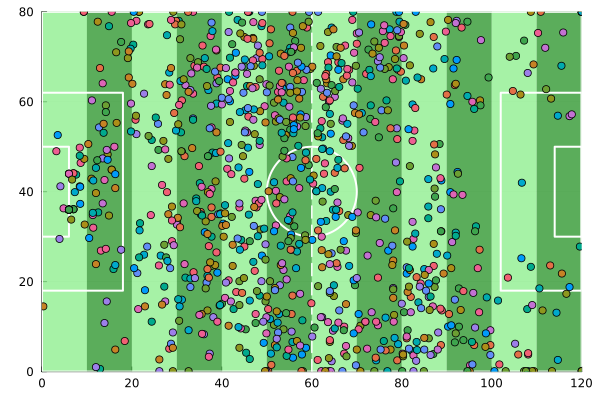

In [37]:
p = createPitch()
for row in eachrow(passes)
    p = Plots.scatter!(p, [row.x], [row.y])
end

# Display the plot
display(p)

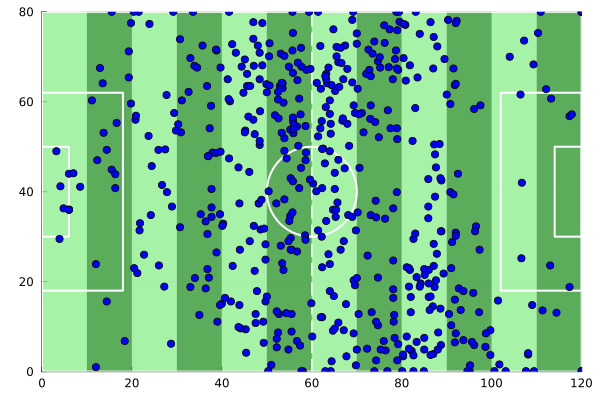

In [41]:
l_passes = filter(r-> r.possession_team_name == "Leicester City", passes)

p = createPitch()
for row in eachrow(l_passes)
    p = Plots.scatter!(p, [row.x], [row.y], color=:blue )
end

# Display the plot
display(p)


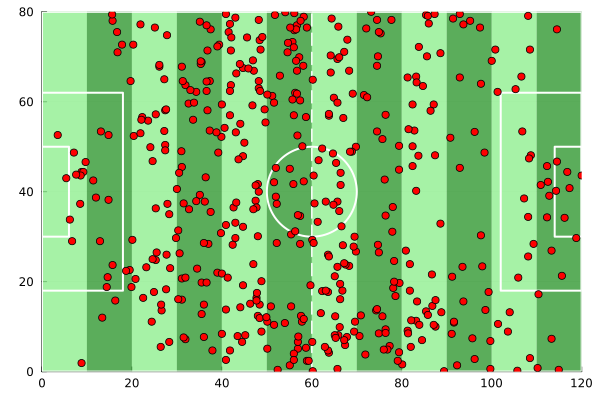

In [ ]:
b_passes = filter(r-> r.possession_team_name == "AFC Bournemouth", passes)

p = createPitch()
for row in eachrow(b_passes)
    Plots.plot!(p, [[row.x], [row.end_x]], [[row.y], [row.end_y]], color=:red, linewidth=2, arrow=:simple )
    Plots.scatter!(p, [row.x], [row.y], color=:red)
    Plots.scatter!(p, [row.end_x], [row.end_y], color=:red)
end

# Display the plot
display(p)